<a href="https://colab.research.google.com/github/snklp/pytorch/blob/pt/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import torch.optim as optim
import tqdm as tqdm

In [ ]:
# ARCHITECTURE (2-layered CNN w/ 50 units in each hidden_layer)
class CNN(nn.Module):
    def __init__(self, in_channels, out_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, 8, kernel_size=(3,3), stride=(1,1), padding=(1,1))    # SAME CONVOLUTION (28X28 -> 28X28)
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))                                 # 28X28 -> 14X14
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3,3), stride=(1,1), padding=(1,1))             # SAME CONVOLUTION (14X14 -> 14X14)
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))                                 # 14X14 -> 7X7
        self.lin = nn.Linear(16*7*7, out_classes)                                                                 

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = F.relu(x)
        x = x.reshape(x.shape[0], -1)  # [batch_size, 1*28*28]
        x = self.lin(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # CHECKING O/P SHAPE OF THE MODEL
# batch_size = 64
# in_size = 128
# out_size = 2
# model = VNN(in_size, out_size)  # init model
# x = torch.randn(batch_size, in_size)
# print(model(x).shape)  # o/p - [64,2]


# HYPERPARAMETERS
batch_size = 64
in_channels = 1
out_classes = 10
lr = 0.001
num_epochs = 3

# LOADING DATA
train_data = CIFAR10(root='', train=True, transform=transform.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_data = CIFAR10(root='', train=False, transform=transform.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# INIT NETWORK
# model = CNN(in_channels, out_classes).to(device)
model = torchvision.models.vgg16(pretrained=True)

# LOSS & OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# TRAINING NETWORK
for epoch in range(num_epochs):
    for batch_idx, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        # print(x.shape)  # [64, 1, 28, 28]
        # print(y.shape)   # [64]
        # break

        
        # predicting values
        y_pred = model(x)

        # predicting loss
        loss = criterion(y_pred, y)

        #optimizing
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# CHECKING ACCURACY
def accuracy(data_loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            num_correct += (y == y_pred.argmax(dim=1)).sum()
            num_samples += x.shape[0]

        print('ACCURACY: ', num_correct/num_samples)
        print(f'{num_correct} Corrects out of {num_samples} Samples')


In [ ]:
accuracy(train_loader, model)

ACCURACY:  tensor(0.9811, device='cuda:0')
58865 Corrects out of 60000 Samples


In [ ]:
# x = torch.randn(3,5)
# print(x)
# print(x.argmax(0))
# print(x.max(0))
# print(x.argmax(1))
# print(x.max(1))

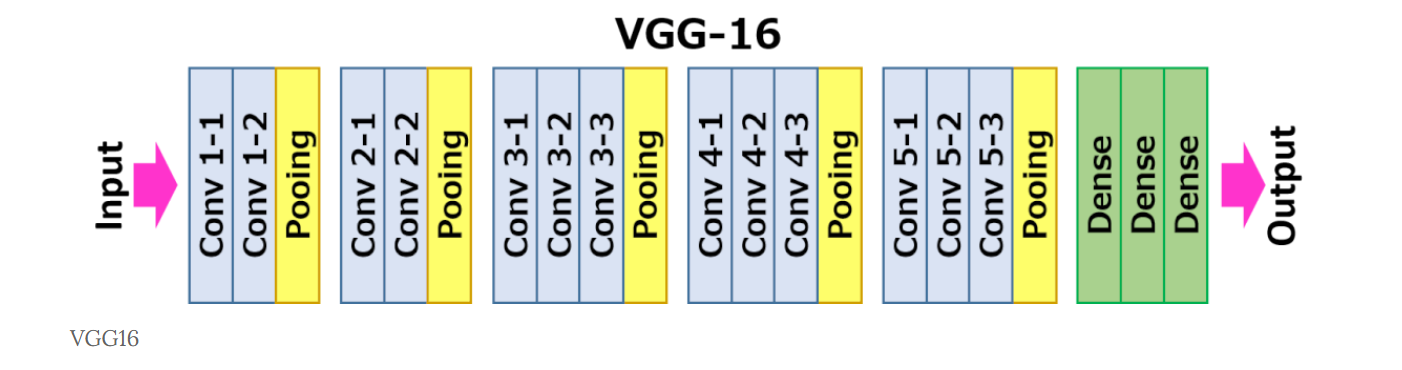

In [6]:
# while training all the weights make pretarined=False
model = torchvision.models.vgg16(pretrained=True)  

# this makes all the pretrained weights to not change
for params i  model.parameters():
    param.requires_grad = False

In [7]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [9]:
model.features[1]

ReLU(inplace=True)

In [10]:
class Identity(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return x

In [11]:
model.avgpool = Identity()   # removes the effect of avgpool layer

In [12]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [14]:
model.classifier = nn.Linear(512, 10)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1